<a href="https://colab.research.google.com/github/paulteeter/DS-Unit-1-Sprint-2-Statistics/blob/master/Paul_Teeter_DSPT7_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, ttest_ind, ttest_1samp
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import normaltest




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
# read in data
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

votes = pd.read_csv(url, header=None, names=column_headers, na_values="?")
votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [21]:
# Replace Y and N to floats
votes = votes.replace({'y': 1,
                       'n': 0})
votes.sample(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
166,republican,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
107,republican,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
246,democrat,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0
149,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
272,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN


In [0]:
# Function to determine confidence interval 

def confidence_int(data, confidence=0.95):
  '''
  Calculate a confidence interval around a sample mean of given data.
  '''
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  std_err = np.std(data, ddof=1)/np.sqrt(n)
  margin_of_err = std_err * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  lower_bound = mean - margin_of_err
  upper_bound = mean + margin_of_err

  return (lower_bound, mean, upper_bound)

In [52]:
# Filter data to pass into function
immigration = votes['immigration'].dropna()
immigration

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
429    1.0
430    1.0
431    1.0
432    0.0
434    1.0
Name: immigration, Length: 428, dtype: float64

In [53]:
aid = votes['el-salvador-aid'].dropna()
aid

0      1.0
1      1.0
2      1.0
4      1.0
5      1.0
      ... 
430    1.0
431    0.0
432    1.0
433    1.0
434    1.0
Name: el-salvador-aid, Length: 420, dtype: float64

In [54]:
water = votes['water-project'].dropna()
water

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
429    0.0
430    0.0
431    0.0
433    0.0
434    1.0
Name: water-project, Length: 387, dtype: float64

In [56]:
religious = votes['religious-groups'].dropna()
religious

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
430    1.0
431    0.0
432    1.0
433    1.0
434    1.0
Name: religious-groups, Length: 424, dtype: float64

In [0]:
crime = votes['crime'].dropna()

In [71]:
# Run confidence function on data
confidence_int(immigration)

(0.45711551746571655, 0.5046728971962616, 0.5522302769268067)

In [59]:
confidence_int(aid)

(0.4567501383795156, 0.5047619047619047, 0.5527736711442939)

In [60]:
confidence_int(water)

(0.45384081311663604, 0.5038759689922481, 0.5539111248678601)

In [61]:
confidence_int(religious)

(0.595678078934313, 0.6415094339622641, 0.6873407889902152)

In [73]:
confidence_int(crime)

(0.546017195315226, 0.5933014354066986, 0.6405856754981711)

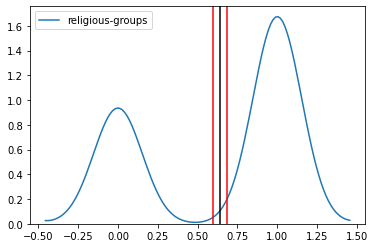

In [66]:
# Only plot that actually looks different
sns.kdeplot(religious)
CI = confidence_int(religious)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

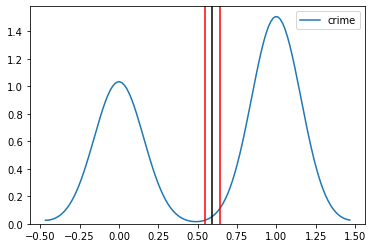

In [74]:
# Another plot that has some variety
sns.kdeplot(crime)
CI = confidence_int(crime)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

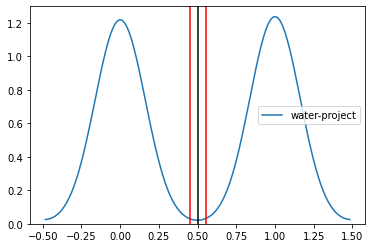

In [67]:
sns.kdeplot(water)
CI = confidence_int(water)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

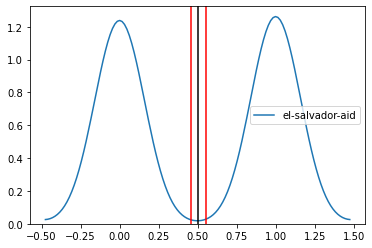

In [68]:
sns.kdeplot(aid)
CI = confidence_int(aid)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

As is apparent through the graphic visualizations, the confidence interval is centered quite neatly around the mean, with very little variance, so in most cases (some bills excluded), we can see any congressman has about a 50% chance of either voting yes or no on any given bill, with about ±5% Margin of Error.

Some bills (being politically motivated, as expected) have a much higher sample mean, but still about the same margin of error, as seen below:

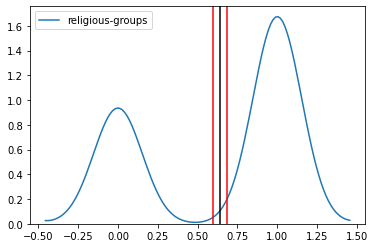

In [81]:
sns.kdeplot(religious)
CI = confidence_int(religious)
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[1], color='k');

In this case, with a sample mean of .641, we can see a higher liklihood of voting yes for any congressional member, with a confidence interval of ±4.5%

In [0]:
#  https://youtu.be/xsXsHLQm5e8?t=933   40:00
# ### Chi-squared tests:
# 4. Take a dataset that we have used in the past in class that has **categorical** 
# variables. Pick two of those categorical variables and run a chi-squared tests on that data
#   - By hand using Numpy
#   - In a single line using Scipy



In [116]:
columns = [ 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
           'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
adults = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                     header=None, names=columns, na_values=' ?', index_col=False)
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [117]:
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
#List the values we observe in the crosstab 
observed_values = pd.crosstab(adults['occupation'], adults['sex'])

In [121]:
# Add margins so we can check totals 
occupation_sex = pd.crosstab(adults['occupation'], adults['sex'], margins=True)
occu = occupation_sex.T
occu

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
sex,,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90,9930
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507,20788
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


In [123]:
# array only female values
females = occu.iloc[0][0:14].values
females

array([2537,    0,  222, 1159,   65,  164,  550, 1800,  141, 1515,   76,
       1263,  348,   90])

In [124]:
# array male values
males = occu.iloc[1][0:14].values
males

array([1233,    9, 3877, 2907,  929, 1206, 1452, 1495,    8, 2625,  573,
       2387,  580, 1507])

In [127]:
# sum up the rows and columns using iloc and slicing
rowsum = occu.iloc[0:2, 14].values
colsum = occu.iloc[2, 0:14].values

print(rowsum)
print(colsum)

[ 9930 20788]
[3770    9 4099 4066  994 1370 2002 3295  149 4140  649 3650  928 1597]


In [125]:
total = occu.loc['All', 'All']
total

30718

In [143]:
# Expected Values across each row
expected_values = []
for i in range(len(rowsum)):
  expected_row = []
  for column in colsum:
    expected_val = column*rowsum[i]/total
    expected_row.append(expected_val)
  expected_values.append(expected_row)

expected_values = np.array(expected_values)
expected_values = expected_values.T
print(expected_values.shape)
print(expected_values)

(14, 2)
[[1218.70238948 2551.29761052]
 [   2.9093691     6.0906309 ]
 [1325.05599323 2773.94400677]
 [1314.38830653 2751.61169347]
 [ 321.32365388  672.67634612]
 [ 442.8706296   927.1293704 ]
 [ 647.17299303 1354.82700697]
 [1065.15235367 2229.84764633]
 [  48.16622176  100.83377824]
 [1338.30978579 2801.69021421]
 [ 209.7978384   439.2021616 ]
 [1179.91080148 2470.08919852]
 [ 299.98828049  628.01171951]
 [ 516.25138355 1080.74861645]]


In [150]:
# Chi-Sq Test
chi_sq = ((observed_values-expected_values)**2 / expected_values).sum().sum()
chi_sq

5792.879142535008

In [149]:
# Now with SciPy:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed_values)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected: \n", np.array(expected_values))

Chi-Squared: 5792.879142535009
P-value: 0.0
Degrees of freedom: 13
Expected: 
 [[1218.70238948 2551.29761052]
 [   2.9093691     6.0906309 ]
 [1325.05599323 2773.94400677]
 [1314.38830653 2751.61169347]
 [ 321.32365388  672.67634612]
 [ 442.8706296   927.1293704 ]
 [ 647.17299303 1354.82700697]
 [1065.15235367 2229.84764633]
 [  48.16622176  100.83377824]
 [1338.30978579 2801.69021421]
 [ 209.7978384   439.2021616 ]
 [1179.91080148 2470.08919852]
 [ 299.98828049  628.01171951]
 [ 516.25138355 1080.74861645]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)